# Лінійна регресія. Лабораторна робота №1.

## 1. Імпортуємо необхідні бібліотеки


In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

## 2. Відкриваємо dataset і переглядаємо його в табличному вигляді


In [249]:
sales = pd.read_csv("./home_data.csv")
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Візуалізація - графік залежності ціни дома від його площі

<Axes: xlabel='sqft_living', ylabel='price'>

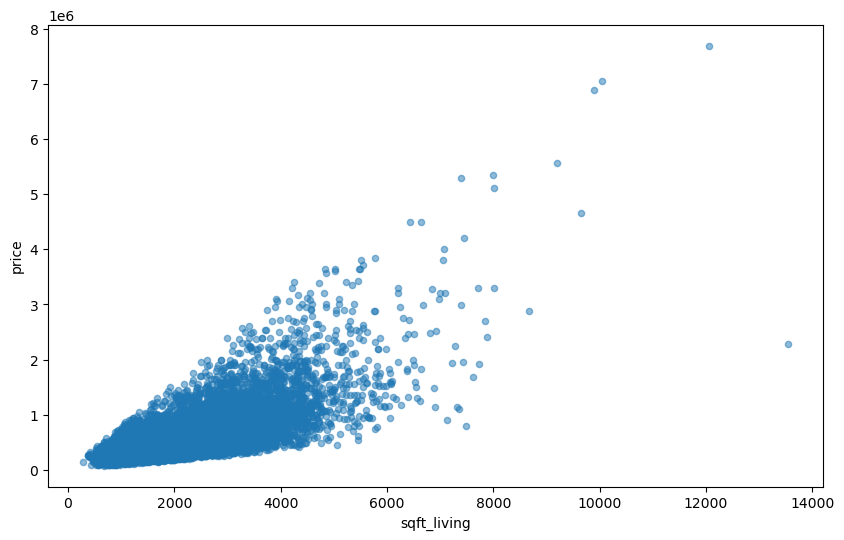

In [250]:
sales.plot.scatter(x="sqft_living", y="price", alpha=0.5, figsize=(10,6))

## 4. Побудова регресійної моделі

In [251]:
# Розбиваємо датасет на навчальну вибірку (80%) та тренувальну. Розбиття буде завжди однаковим.
training_set = sales.sample(frac=0.8, random_state=0)
test_set = sales[~sales.id.isin(training_set.id)]
# Будуємо регресійну модель на навчальній виборці: залежна змінна - вартість (price), незалежна - площа (sqft_living).
training_sqft = training_set[['sqft_living']]
training_price = training_set['price']
sqft_model = lm.LinearRegression()
sqft_model.fit(training_sqft, training_price)
# Для навчання моделі використовується Метод Найменших Квадратів (Ordinary Least Squares, OLS).
# Передбачимо ціну для тестової вибірки
test_price = test_set['price']
test_sqft = test_set[['sqft_living']]
predicted_price = sqft_model.predict(test_sqft)
print(f"Test price (first value): {test_price.values[0]}")
print(f"Predicted price (first value): {round(predicted_price[0])}")

Test price (first value): 662500
Predicted price (first value): 958204


## 5. Оцінка моделі

In [252]:
# Знайдемо середню ціну по тестовій вибірці
average_price = test_set['price'].mean()
print(f"Cередня ціна (округлена): {round(average_price)}")
# Оцінимо модель
mse = mean_squared_error(test_price, predicted_price)
rmse = np.sqrt(mse)
print(f"RMSE (округлена): {round(rmse)}")
print(f"Похибка передбачень складає ≈ {round(rmse / average_price * 100)}% від середньої ціни.")

Cередня ціна (округлена): 538921
RMSE (округлена): 252165
Похибка передбачень складає ≈ 47% від середньої ціни.


## 6. Вивчимо передбачені ціни і порівняємо з реальними


Коєфіцієнт (slope): [282.34041671]
Вільний член (intercept): -46927.76803220215
Загальна формула моделі: y = -46928 + 282x


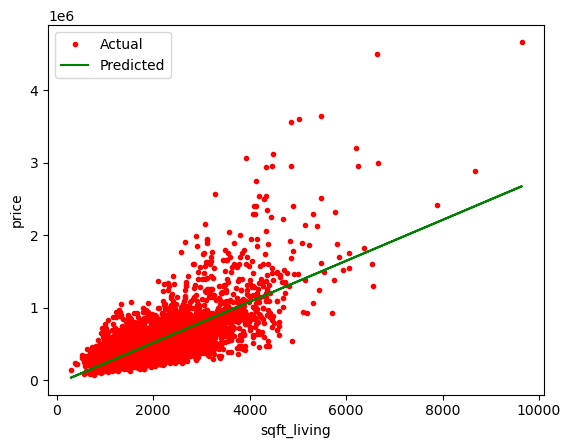

In [253]:
# Виводимо два графіки для порівняння цін - реальних (червоні) і передбачених (зелені)
plt.plot(test_sqft, test_price, 'r.', test_sqft, predicted_price, 'g-')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(['Actual', 'Predicted'])

# Подивимось на коефіцієнти моделі
print(f"Коєфіцієнт (slope): {sqft_model.coef_}")
print(f"Вільний член (intercept): {sqft_model.intercept_}")
print(f"Загальна формула моделі: y = {round(sqft_model.intercept_)} + {round(sqft_model.coef_[0])}x")

## 7. Використаємо більше ознак

In [254]:
# Визначаємо ознаки
my_features = ['bathrooms', 'bedrooms', 'floors', 'sqft_living', 'sqft_lot', 'zipcode']
sales[my_features].describe()

,bathrooms,bedrooms,floors,sqft_living,sqft_lot,zipcode
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,2.114757,3.370842,1.494309,2079.899736,1.510697e+04,98077.939805
std,0.770163,0.930062,0.539989,918.440897,4.142051e+04,53.505026
min,0.000000,0.000000,1.000000,290.000000,5.200000e+02,98001.000000
25%,1.750000,3.000000,1.000000,1427.000000,5.040000e+03,98033.000000
50%,2.250000,3.000000,1.500000,1910.000000,7.618000e+03,98065.000000
75%,2.500000,4.000000,2.000000,2550.000000,1.068800e+04,98118.000000
max,8.000000,33.000000,3.500000,13540.000000,1.651359e+06,98199.000000


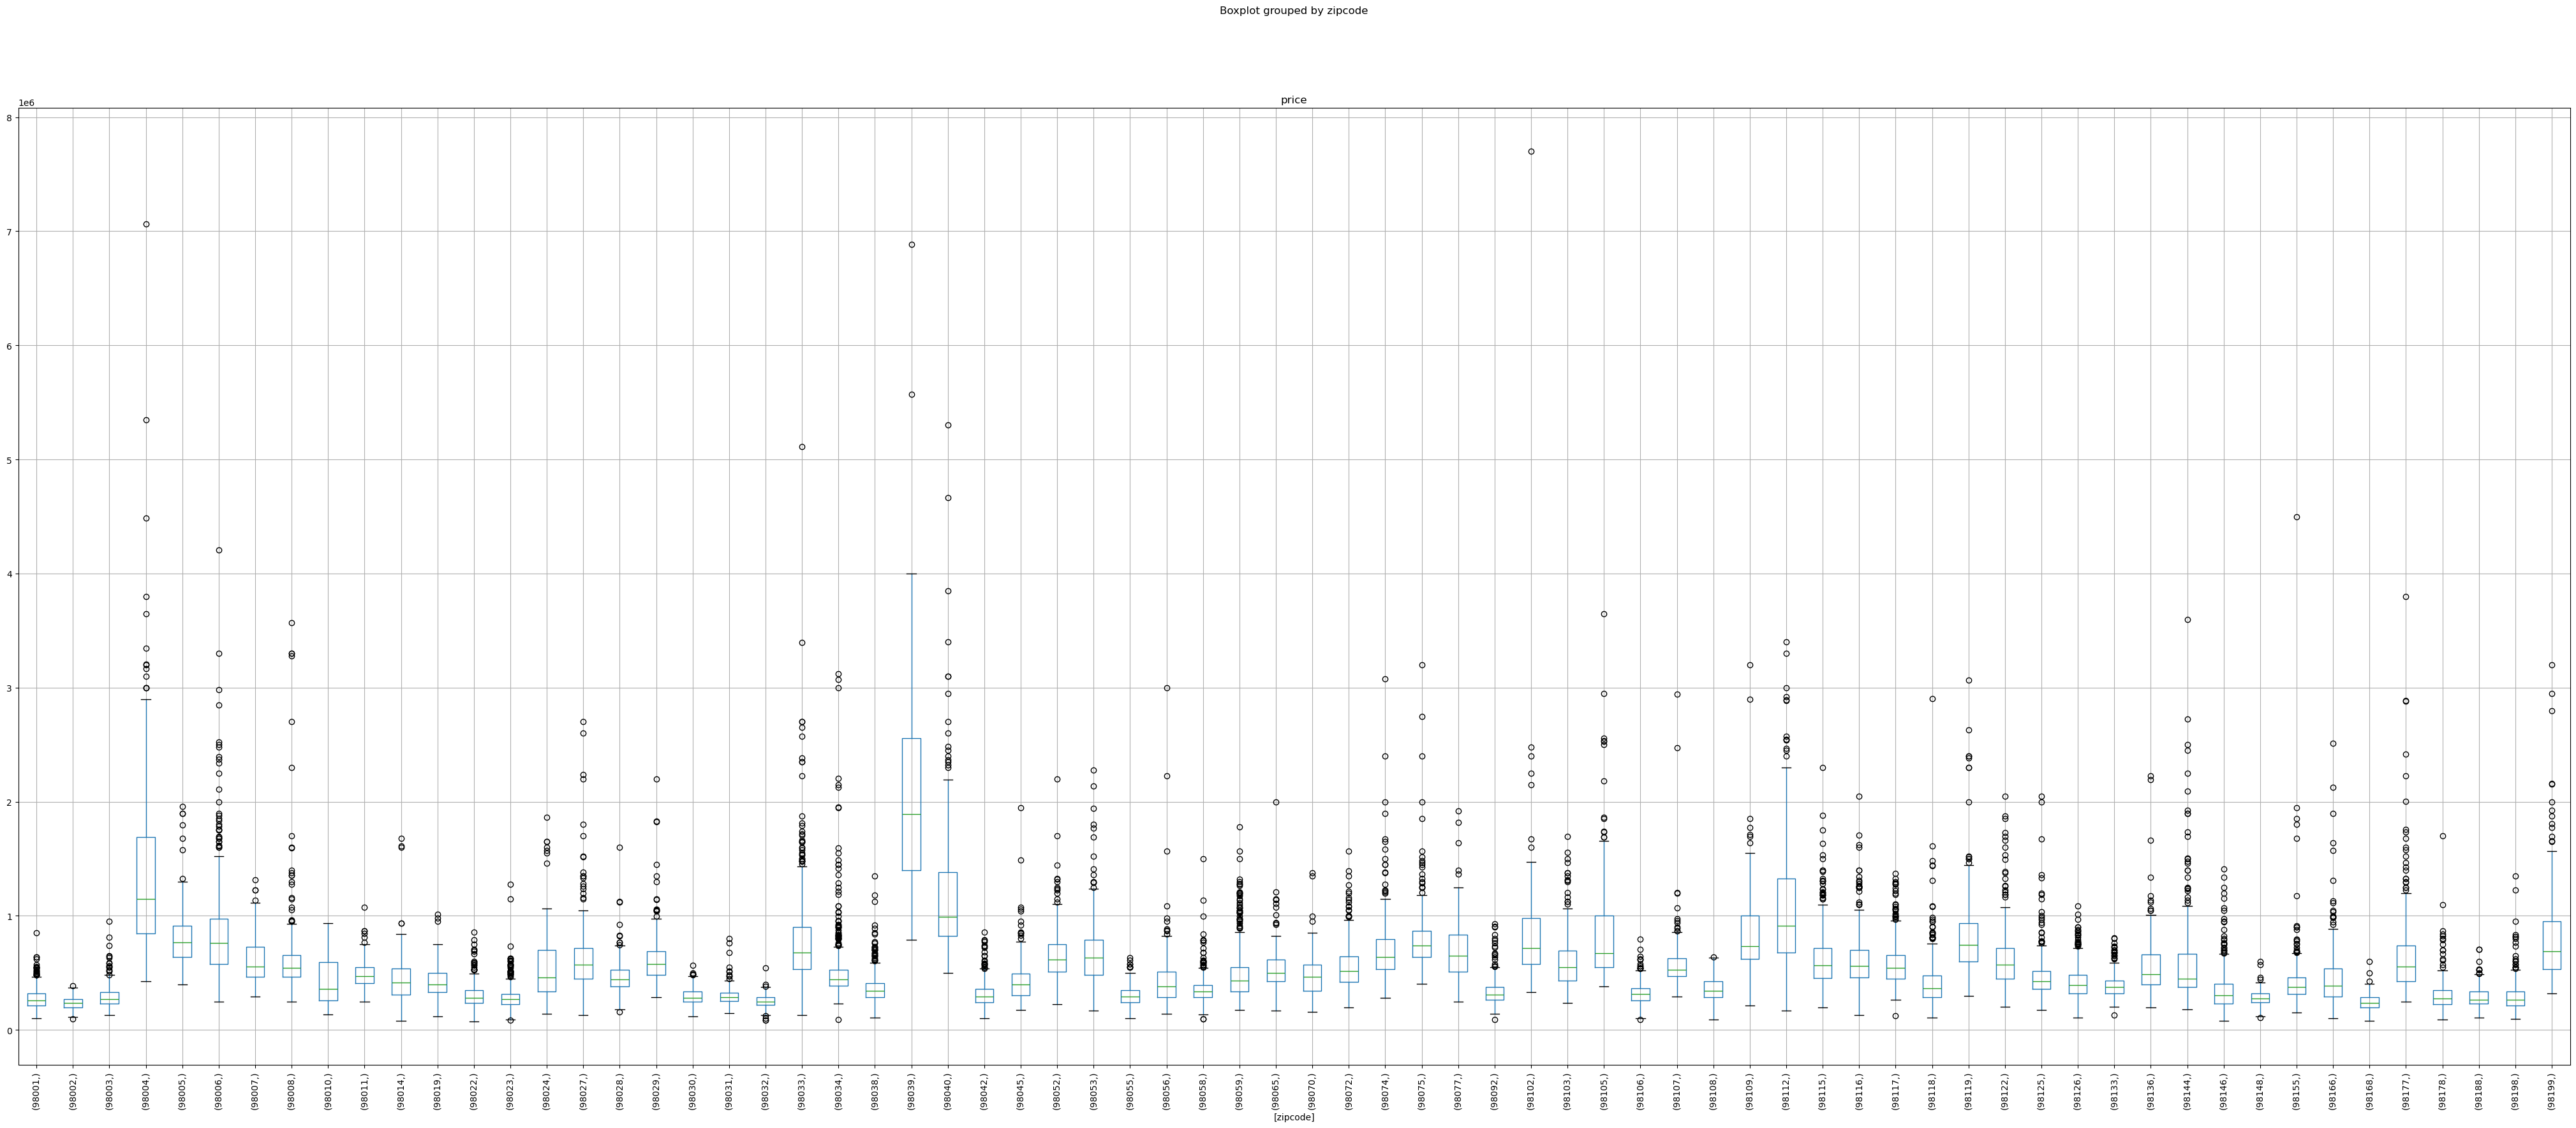

In [255]:
# Візуалізуємо залежності графічно
sales.boxplot(column=["price"], by=["zipcode"], figsize=(50, 20))
plt.xticks(rotation=90)
plt.show()

In [256]:
# Будуємо модель
training_features = training_set[my_features]
training_price = training_set['price']

test_features = test_set[my_features]

my_features_model = lm.LinearRegression()
my_features_model.fit(training_features, training_price)

predicted_price_by_features = my_features_model.predict(test_features)

print(f"MSE: {mean_squared_error(test_price, predicted_price_by_features)}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_price, predicted_price_by_features))}")

MSE: 61767625145.87741
RMSE: 248530.9339818233


In [257]:
# Порівнюємо моделі
print(f"Previous RMSE: {np.sqrt(mean_squared_error(test_price, predicted_price))}")
print(f"Current RMSE: {np.sqrt(mean_squared_error(test_price, predicted_price_by_features))}")

Previous RMSE: 252165.3463792749
Current RMSE: 248530.9339818233


## 8. Використання отриманих моделей для передбачення вартості будинків

In [258]:
# Будинок 1
house1 = sales[sales['id'] == 5309101200]
print(f"House 5309101200 - real price: {house1['price'].values[0]}")
print(f"House 5309101200 - predicted price (one feature): {sqft_model.predict(house1[['sqft_living']])}")
print(f"House 5309101200 - predicted price (multiple features): {my_features_model.predict(house1[my_features])}")

House 5309101200 - real price: 620000
House 5309101200 - predicted price (one feature): [630689.23208004]
House 5309101200 - predicted price (multiple features): [628552.38356937]


In [259]:
# Будинок 2
house2 = sales[sales['id'] == 1925069082]
print(f"House 1925069082 - real price: {house2['price'].values[0]}")
print(f"House 1925069082 - predicted price (one feature): {sqft_model.predict(house2[['sqft_living']])}")
print(f"House 1925069082 - predicted price (multiple features): {my_features_model.predict(house2[my_features])}")

House 1925069082 - real price: 2200000
House 1925069082 - predicted price (one feature): [1263131.76551813]
House 1925069082 - predicted price (multiple features): [1266719.60920933]


In [260]:
# Будинок 3
bill_gates = {'bedrooms':[8],
 'bathrooms':[25],
 'sqft_living':[50000],
 'sqft_lot':[225000],
 'floors':[4],
 'zipcode':['98039'],
 'condition':[10],
 'grade':[10],
 'waterfront':[1],
 'view':[4],
 'sqft_above':[37500],
 'sqft_basement':[12500],
 'yr_built':[1994],
 'yr_renovated':[2010],
 'lat':[47.627606],
 'long':[-122.242054],
 'sqft_living15':[5000],
 'sqft_lot15':[40000]}
bill_gates_df = pd.DataFrame(bill_gates)
print(f"Bill Gates's house - predicted price (one feature): {sqft_model.predict(bill_gates_df[['sqft_living']])}")
print(f"Bill Gates's house - predicted price (multiple features): {my_features_model.predict(bill_gates_df[my_features])}")

Bill Gates's house - predicted price (one feature): [14070093.06763943]
Bill Gates's house - predicted price (multiple features): [15857687.61884998]


## Домашнє завдання
### 1. Вибір і підрахунок статистик
Вибрати район с zip-кодом, де виконуються умови по варіанту (__№5 мінімальна ціна ->  максимальна__) та підрахуйте необхідну вартість.


In [261]:
# Формування вибірки мінімальних ціни -> вибір максимальної та її вивід разом з кодом району
min_prices_per_zipcode = sales.groupby("zipcode").agg({'price': 'min'})['price']
max_of_mins = min_prices_per_zipcode.max()
max_zipcode = min_prices_per_zipcode.idxmax()
print(f"Серед мінімальних цін за нерухомість в кожному районі, максимальною є {max_of_mins}$ яка належить району з індексом {max_zipcode}.")

Серед мінімальних цін за нерухомість в кожному районі, максимальною є 787500$ яка належить району з індексом 98039.


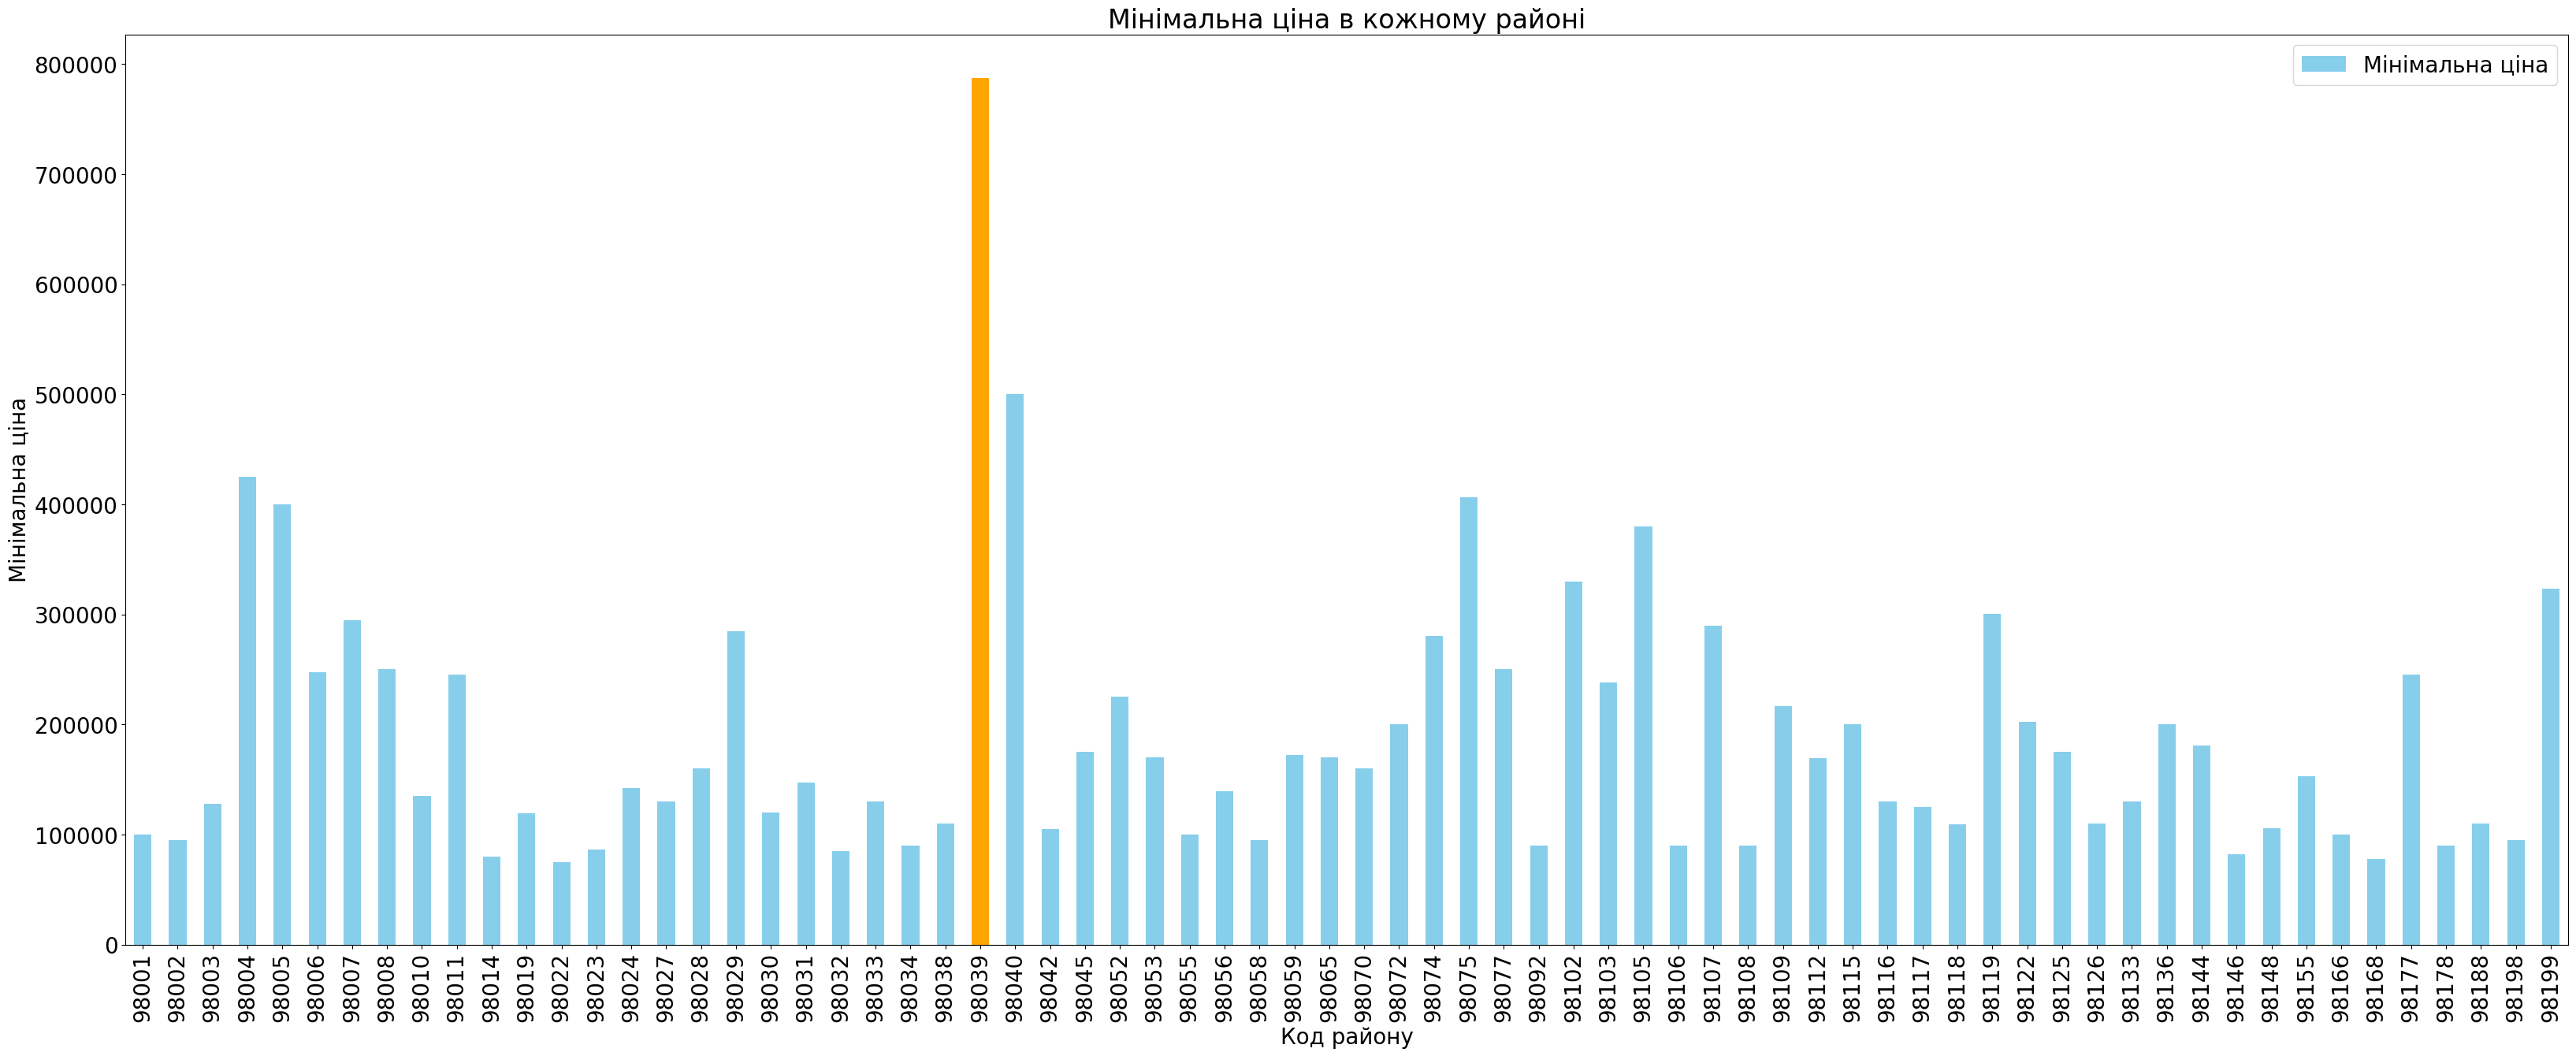

In [262]:
# Візуалізація мінімальної ціни в кожному районі
plt.rcParams.update({'font.size': 20})
colors = ["orange" if x == max_zipcode else "skyblue" for x in min_prices_per_zipcode.index]
bars = min_prices_per_zipcode.plot(kind="bar", figsize=(40, 15), color=colors)
bars.legend(["Мінімальна ціна"])
plt.title("Мінімальна ціна в кожному районі")
plt.xlabel("Код району")
plt.ylabel("Mінімальна ціна")
plt.show()

### 2. Фільтрація
Підрахувати процентне відношення записів, що відповідають умові по варіанту (__рік споруди > 2000__), до загальної кількості в датасеті.

In [263]:
# Фільтрація загальної вибірки та розрахунок проценту, відфільтрованої за умовою, вибірки
sales_filtered = sales[sales['yr_built'] > 2000]
quantity_sales_filtered = len(sales_filtered)
quantity_sales = len(sales)
percentage = (quantity_sales_filtered / quantity_sales) * 100
print(f"Процент виборки житлових будинків, які побудовані після 2000 року, складає {percentage:.2f}% від загальної вибірки.")

Процент виборки житлових будинків, які побудовані після 2000 року, складає 21.01% від загальної вибірки.


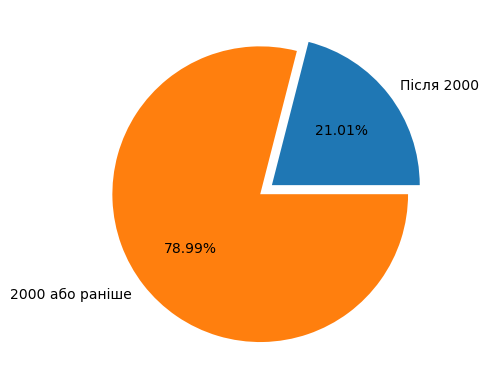

In [264]:
# Візуалізація процентного співвідношення двох вибірок
plt.rcParams.update({'font.size': 10})
sales_sets = [quantity_sales_filtered, quantity_sales - quantity_sales_filtered]
labels = ["Після 2000", "2000 або раніше"]
explodes = [0.1, 0]
plt.pie(sales_sets, labels=labels, explode=explodes, autopct='%.2f%%')
plt.show()

### 3. Регресійні моделі
Побудова регресійної моделі з ознакою "житлова площа" та іншими ознаками по варіанту (__'lat', 'long', 'sqft_living15'__) та порівняння її ефективності з моделлю на ознаках my_features (різниця між RMSE).

In [265]:
# Вивчення нових ознах та їх залежності від ціни
my_features_1 = ['sqft_living','sqft_living15', 'lat', 'long']
sales[my_features_1].describe()

,sqft_living,sqft_living15,lat,long
count,21613.000000,21613.000000,21613.000000,21613.000000
mean,2079.899736,1986.552492,47.560053,-122.213896
std,918.440897,685.391304,0.138564,0.140828
min,290.000000,399.000000,47.155900,-122.519000
25%,1427.000000,1490.000000,47.471000,-122.328000
50%,1910.000000,1840.000000,47.571800,-122.230000
75%,2550.000000,2360.000000,47.678000,-122.125000
max,13540.000000,6210.000000,47.777600,-121.315000


Text(0.5, 0, 'Житлова площа в квадратних футах')

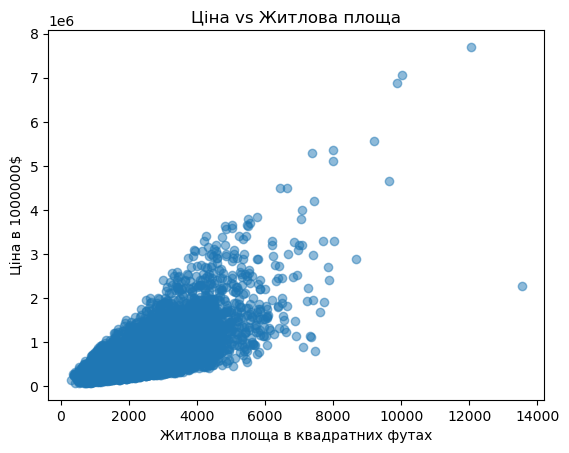

In [266]:
plt.figure(1)
plt.scatter(x=sales['sqft_living'], y=sales['price'], alpha=0.5)
plt.title("Ціна vs Житлова площа")
plt.ylabel("Ціна в 1000000$")
plt.xlabel("Житлова площа в квадратних футах")

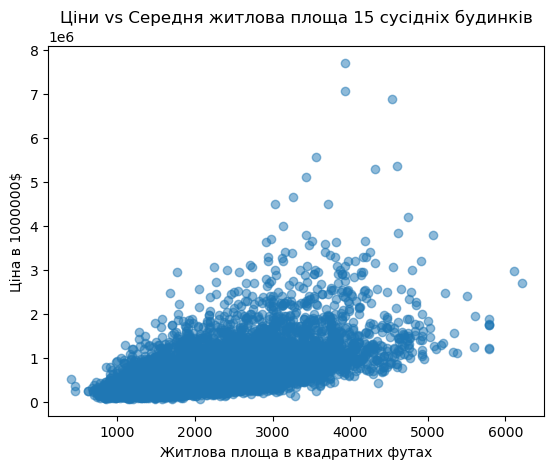

In [267]:
plt.figure(2)
plt.title("Ціни vs Cередня житлова площа 15 сусідніх будинків")
plt.ylabel("Ціна в 1000000$")
plt.xlabel("Житлова площа в квадратних футах")
plt.scatter(x=sales['sqft_living15'], y=sales['price'],  alpha=0.5)

In [268]:
# Побудова регресійної моделі
training_features_1 = training_set[my_features_1]
test_features_1 = test_set[my_features_1]

my_features_model_1 = lm.LinearRegression()
my_features_model_1.fit(training_features_1, training_price)

predicted_price_by_features_1 = my_features_model_1.predict(test_features_1)

In [269]:
# Порівняння моделей
print(f"Previous RMSE (my_features): {np.sqrt(mean_squared_error(test_price, predicted_price_by_features))}")
print(f"Current RMSE (my_features_1): {np.sqrt(mean_squared_error(test_price, predicted_price_by_features_1))}")

Previous RMSE (my_features): 248530.9339818233
Current RMSE (my_features_1): 224664.207614555
